# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.96893682 2.50888787 2.37673469 2.1670441  2.25159581 2.76200466
 2.12101305 2.92648634 2.8518289  2.49847563]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# Funcion
def uniRanNum(bottom, ceiling, count):
    return np.random.uniform(bottom, ceiling, count)    

In [4]:
# Crear los dos conjuntos de números
set_1 = uniRanNum(10, 15, 100)
set_2 = uniRanNum(10, 60, 1000)

Text(0.5, 1.0, 'bottom=10, ceiling=60, count=1000')

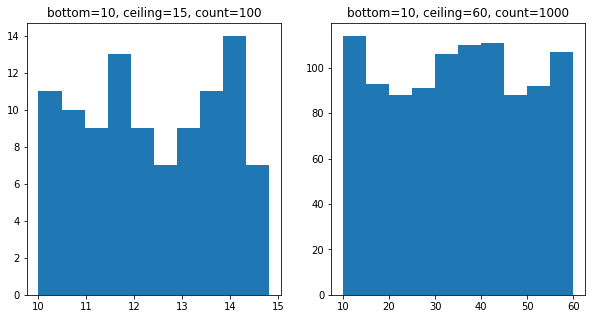

In [5]:
# Histogramas 
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.sca(ax[0])
plt.hist(set_1, bins = 10)
plt.title("bottom=10, ceiling=15, count=100")
plt.sca(ax[1])
plt.hist(set_2, bins = 10)
plt.title("bottom=10, ceiling=60, count=1000")


How are the two distributions different?

*A medida que se aumenta el número de los elementos en el conjunto de datos, éstos tienden a tener la misma frecuencia*.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [6]:
# Función
def norRanNum(mu, sigma, size):
    return np.random.normal(mu, sigma, size)

# Crear los conjuntos de datos
set_3 = norRanNum(10,1,1000)
set_4 = norRanNum(10,50,1000)

Text(0.5, 1.0, 'mu=10, sigma=50, count=1000')

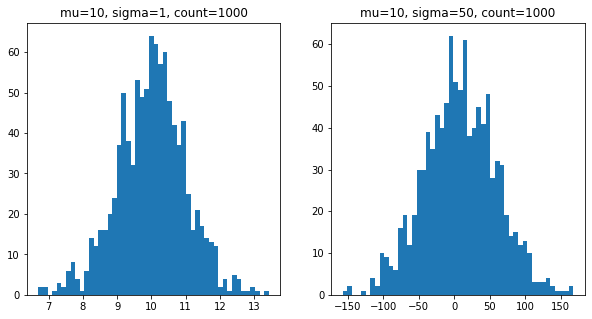

In [7]:
# Histogramas 
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.sca(ax[0])
plt.hist(set_3, bins = 50)
plt.title("mu=10, sigma=1, count=1000")
plt.sca(ax[1])
plt.hist(set_4, bins = 50)
plt.title("mu=10, sigma=50, count=1000")

How are the two distributions different?

*No se aprecian diferencias notables entre ambas distribuciones*

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [53]:
data = pd.read_csv('vehicles.csv')
barrels = data[["Fuel Barrels/Year"]]
barrels

,Fuel Barrels/Year
0,19.388824
1,25.354615
2,20.600625
3,25.354615
4,20.600625
...,...
35947,9.155833
35948,9.155833
35949,9.155833
35950,9.155833


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(barrels)

2. CO2 Emission Grams/Mile 

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(data[["CO2 Emission Grams/Mile"]])

3. Combined MPG

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(data[["Combined MPG"]])

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# your answer here

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

Text(0.5, 1.0, 'beta = 10, count=1000')

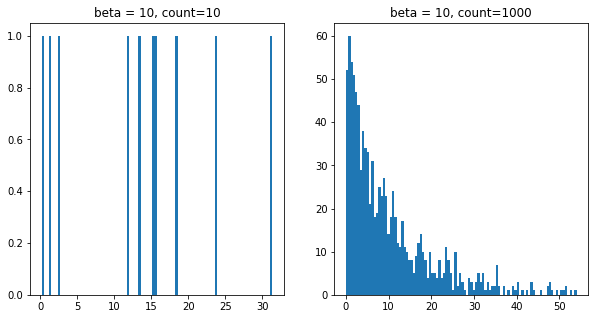

In [46]:
# Función
def expRanNum(mean,size):
    return np.random.exponential(scale= mean, size=(size,1))

# Comentarios:
# Si la media de una distribución exponencial es 1/lambda, y el parámetro de escala se define como 1/lambda,
# encontes la escala va a ser igual a la media. He metido 1000 en lugar de 100
# Crear dos sets de datos
set_5 = expRanNum(10,10)
set_6 = expRanNum(10,1000)

# Histogramas 
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.sca(ax[0])
plt.hist(set_5, bins = 100)
plt.title("beta = 10, count=10")
plt.sca(ax[1])
plt.hist(set_6, bins = 100)
plt.title("beta = 10, count=1000")

How are the two distributions different?

*A medida que aumenta el número de elementos de la muestra, la distribución de ésta se asemeja más a una distribución exponencial.*

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [48]:
# your answer here
# Hint: This is same as saying P(x<15)
lamb = 1/10
x = 15

# Escribimos la fórmula para calcular la probabilidad de que la variable tome un valor menor o igual a 15
# o lo que es lo mismo, calcular su cdf
cdf=1-np.exp(-lamb*x)
print(round(cdf, 3))

0.777


What is the probability that the customer will spend more than 15 minutes

*Como el valor máximo de la cdf es 1, será 1-0.777 = 0.333*